<a href="https://colab.research.google.com/github/kishansheth/interfaces-hw1/blob/master/Interfaces_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visual Combination Lock - Visual Interfaces HW1
Kishan Sheth (kps2138)

Professor John Kender



##1.1 Domain Engineering Step

For this project, my domain includes my Nikon D5300 DSLR (mounted on a tripod), a black sheet as a backdrop, and my own hand as the subject.

**Camera & Backdrop**

To set up the domain, first, I hung the black sheet from the bunk beds near my desk. Next, I mounted my camera on my tripod and placed this apparatus on my desk. Finally, I marked the location of the tripod on my desk to ensure I take pictures at a consistent distance from the backdrop. 

**Lighting**

To ensure that lighting is consistent, I decided to only use the overhead light in my dorm room and to take pictures at night, when there is no light entering through the window. 

**Image Resizing**

My DSLR is set to shoot RGB images with dimensions 4496 x 3000 x 3, which is a little large for quick image processing (approximately 6MB per image). Thus, before processing, I resized each image by a factor of 1/8 using opencv's `resize()` function, yielding final images of dimensions 562 x 375 x 3 (approximately 49KB per image). 

In [94]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Interfaces/HW1/images

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Interfaces/HW1/images


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

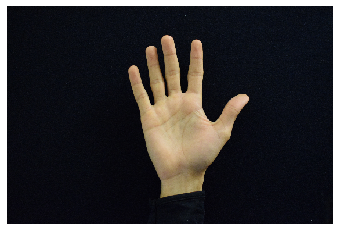

In [96]:
# Image import and resizing
img = cv2.imread('open_center2.jpg')
img = cv2.resize(img, (562, 375))

plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

##1.2 Data Reduction Step

In this step, I use various methods from the OpenCV package to determine what portions of the image are skin versus backdrop. 

**Detecting Skin**

As Professor Kender has mentioned in class, skin is fundamentally the color of blood. Therefore, using a custom `skinMask()` function, we can create a mask over pixels that are within the range of the color of blood. [Research done by Kolkur et al.](https://arxiv.org/pdf/1708.02694.pdf) suggests that the color range of human skin can be roughly defined as follows:

0.0 <= H <= 50.0 and 0.23 <= S <= 0.68 

and R > 95 and G > 40 and B > 20 

and R > G and R > B

and | R - G | > 15 and A > 15

Although this is what the paper recommends, after some experimentation, I realized this color range doesn't account for some of the darker, or shadowed portions of the hand, given the lighting and subject (me) in my domain.

Therefore, I adjusted the parameters to account for my own domain. I reduced the R threshold to be R > 65 instead of R > 95.

**Blob Detection**

Once a binary image has been created, we can use the `SimpleBlobDetector()` class in OpenCV to find an approximate border of the hand. I use documentation from [Blob Detection Using OpenCV](https://learnopencv.com/blob-detection-using-opencv-python-c/) for reference.

###1.3 Parsing and Performance Step

In this step I define a grammar and analyze the performance of my system on 12 different sequences of images. 

**Defining a Grammar**

The grammar I choose to define in this step includes 5 different hand locations:

*   top-left
*   top-right
*   center
*   bottom-left
*   bottom-right

and 2 different hand positions:

*   fist
*   splay





In [0]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb = cv2.blur(rgb, (5,5))

for i in range(rgb.shape[0]):
  for j in range(rgb.shape[1]):
    pix = rgb[i][j]
    r = pix[0]
    g = pix[1]
    b = pix[2]

    if r>60 and g>40 and b>20 and r>g and r>b:
      rgb[i][j] = np.array([255, 255, 255])

rgb = cv2.copyMakeBorder(rgb, top=10, bottom=10, left=10, right=10, borderType= cv2.BORDER_CONSTANT, value=[0,0,0] ) 
ret,rgb = cv2.threshold(rgb,127,255,cv2.THRESH_BINARY)

# hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# print(hsv)




1427.6021542549133


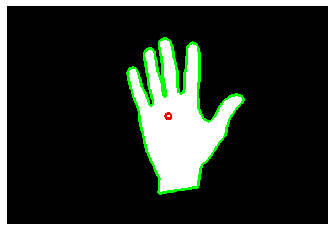

In [107]:
# Find contours of masked pixels 
ret,thresh = cv2.threshold(cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY),127,255,0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find main contour, with most points (ignore small gaps and noise)
main_len = 0
main_contour = []

for contour in contours:
  if len(contour) > main_len:
    main_len = len(contour)
    main_contour = contour

cv2.drawContours(rgb, [main_contour], 0, (0,255,0), 3)

center, radius	=	cv2.minEnclosingCircle(main_contour)
center = (int(center[0]), int(center[1]))
cv2.circle(rgb, center, 5, (255,0,0), 3)

perimeter = cv2.arcLength(main_contour,True)
print(perimeter)

plt.axis("off")
plt.imshow(rgb)
plt.show()
